In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense # dense linear equation
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [2]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [3]:
# flattening the images to 1D 3072 pixels
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)



In [4]:
# converting from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [6]:
# one-hot encoding using keras numpy-related utilities
# np-utils.to_categorical is used to convert array of labeled data (from 0 to nb_classes - 1) to one hot vector
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [7]:
# step 2: defining the model
# 3 hidden layers
L1 = 200 # neurons
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 3072, activation = 'relu'))
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))
# based on 10 digits
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
500/500 [==============================] - 6s 6ms/step - loss: 1.9008 - accuracy: 0.3080 - val_loss: 1.7416 - val_accuracy: 0.3810
Epoch 2/10
500/500 [==============================] - 3s 5ms/step - loss: 1.6959 - accuracy: 0.3894 - val_loss: 1.6746 - val_accuracy: 0.4039
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 1.6195 - accuracy: 0.4203 - val_loss: 1.6053 - val_accuracy: 0.4273
Epoch 4/10
500/500 [==============================] - 3s 5ms/step - loss: 1.5620 - accuracy: 0.4426 - val_loss: 1.5616 - val_accuracy: 0.4396
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 1.5212 - accuracy: 0.4569 - val_loss: 1.5470 - val_accuracy: 0.4495
Epoch 6/10
500/500 [==============================] - 3s 5ms/step - loss: 1.4958 - accuracy: 0.4637 - val_loss: 1.5018 - val_accuracy: 0.4687
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 1.4649 - accuracy: 0.4780 - val_loss: 1.5104 - val_accuracy: 0.4699
Epoch 

In [8]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

In [9]:
epochs = range(1, len(acc2) + 1)

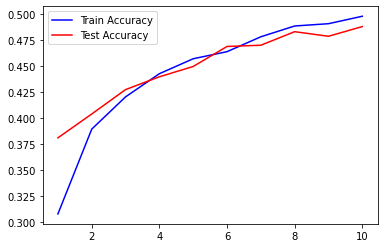

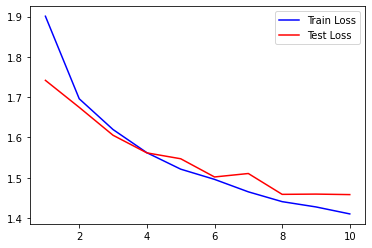

In [10]:
plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.show()